In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [3]:
from sqlalchemy import create_engine

# Define connection parameters
server = r'DESKTOP-CBADVFM\SQLEXPRESS'  # Use raw string or double backslashes
database = 'DE_CAPSTONE_PROJECT'        # Database name without brackets

# Create connection string for Windows Authentication
connection_string = f'mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=SQL+Server'

# Create engine
engine = create_engine(connection_string)




## Q1. A list showing employee number, last name, first name, sex, and salary for each employee

In [9]:
employees = pd.read_sql('select * from [dbo].[employees]',engine)
salaries = pd.read_sql('select * from [dbo].[salaries]',engine)

In [11]:
df = pd.merge(employees, salaries,'inner', on='emp_no')
df.sample(5)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,salary
145437,404920,e0003,1962-08-13,Yakichi,Remmers,F,1988-04-16,5,C,True,1993-08-21,42930.0
165767,423402,e0003,1961-04-28,Van,Mikschl,M,1992-10-23,3,PIP,False,None,40000.0
275094,75070,e0004,1964-10-10,Fumiya,Colorni,M,1986-10-12,6,C,False,None,43130.0
82396,256701,e0003,1952-11-24,Chikako,Veevers,F,1988-07-10,1,PIP,False,None,40000.0
299885,99861,e0003,1953-01-20,IEEE,Waeselynck,F,1999-06-06,8,C,False,None,40000.0


In [13]:
df1=df[['emp_no','last_name','first_name','sex','salary']]
df1.head(5)

,emp_no,last_name,first_name,sex,salary
0,100000,Emden,Hiroyasu,M,41408.0
1,100001,Antonakopoulos,Jasminko,M,40000.0
2,100002,Kolinko,Claudi,F,40000.0
3,100003,Trogemann,Marsja,M,40000.0
4,100004,Nitsch,Avishai,M,79525.0


## Q2. A list showing first name, last name, and hire date for employees who were hired in 1986.

In [15]:
df['hire_date'] = pd.to_datetime(df['hire_date'])

In [17]:
df2=df.loc[df['hire_date'].dt.year==1986,['first_name','last_name','hire_date']]
df2.head()

,first_name,last_name,hire_date
4,Avishai,Nitsch,1986-01-03
6,Janalee,Himler,1986-01-15
10,Georgi,Facello,1986-06-26
18,Saeko,Radwan,1986-08-23
25,Boutros,Emiris,1986-09-10


## Q3.A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [19]:
dept_manager=pd.read_sql('select * from [dbo].[dept_manager]',engine)
departments=pd.read_sql('select * from [dbo].[departments]',engine)

In [21]:
df = pd.merge(employees, dept_manager,'inner', on='emp_no')
df1=pd.merge(df, departments,'inner', on='dept_no')

In [23]:
df3=df1[['dept_no','dept_name','emp_no','last_name','first_name']]
df3.head()

,dept_no,dept_name,emp_no,last_name,first_name
0,d001,Marketing,110022,Markovitch,Margareta
1,d001,Marketing,110039,Minakawa,Vishwani
2,d002,Finance,110085,Alpin,Ebru
3,d002,Finance,110114,Legleitner,Isamu
4,d003,Human Resources,110183,Ossenbruggen,Shirish


## Q4.A list showing the department of each employee with the following information: employee number, last name, first name, and department name

In [25]:
dept_emp=pd.read_sql('select * from [dbo].[dept_emp]',engine)

In [27]:
df = pd.merge(employees, dept_emp,'inner', on='emp_no')
df1=pd.merge(df, departments,'inner', on='dept_no')

In [29]:
df1.head(2)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,dept_name
0,100000,s0002,1956-01-11,Hiroyasu,Emden,M,1991-07-02,1,S,False,None,d008,Research
1,100001,e0002,1953-02-07,Jasminko,Antonakopoulos,M,1994-12-25,9,B,False,None,d005,development


In [31]:
df4=df1[['emp_no','last_name','first_name','dept_name']]
df4.head(5)

,emp_no,last_name,first_name,dept_name
0,100000,Emden,Hiroyasu,Research
1,100001,Antonakopoulos,Jasminko,development
2,100001,Antonakopoulos,Jasminko,Research
3,100002,Kolinko,Claudi,Research
4,100003,Trogemann,Marsja,development


## Q5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B“

In [33]:
emp=employees.loc[(employees['first_name']=='Hercules')&(employees['last_name'].str.startswith('B')),['first_name','last_name','sex']]
emp.head()

,first_name,last_name,sex
3101,Hercules,Benzmuller,M
11361,Hercules,Brendel,F
28604,Hercules,Baranowski,M
31131,Hercules,Bernatsky,M
34933,Hercules,Bail,F


## Q6.A list showing all employees in the Sales department, including their employee number,last name, first name, and department name

In [35]:
df = pd.merge(employees, dept_emp,'inner', on='emp_no')
df1=pd.merge(df, departments,'inner', on='dept_no')

In [37]:
df6=df1.loc[df1['dept_name']=='Sales',['emp_no','last_name','first_name','dept_name']]
df6

,emp_no,last_name,first_name,dept_name
5,100004,Nitsch,Avishai,Sales
6,100005,Foong,Anneke,Sales
8,100007,Bernardinello,Zine,Sales
10,100009,Veldwijk,Barton,Sales
19,100016,Schnabel,Yishai,Sales
...,...,...,...,...
331573,99972,Schaaf,Jaana,Sales
331577,99976,Eastman,Toshiko,Sales
331585,99983,Laurillard,Shaz,Sales
331589,99987,Range,Mang,Sales


## Q7.A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name

In [39]:
df7=df1.loc[(df1['dept_name']=='Sales')|(df1['dept_name']=='development'),['emp_no','last_name','first_name','dept_name']]
df7.head()

,emp_no,last_name,first_name,dept_name
1,100001,Antonakopoulos,Jasminko,development
4,100003,Trogemann,Marsja,development
5,100004,Nitsch,Avishai,Sales
6,100005,Foong,Anneke,Sales
8,100007,Bernardinello,Zine,Sales


## Q8. A list showing the frequency count of employee last names, in descending order.( i.e., how many employees share each last name

In [41]:
emp_count=employees.last_name.value_counts()
emp_count

last_name
Baba         226
Gelosh       223
Coorg        223
Farris       222
Sudbeck      222
            ... 
Zykh         148
Georgatos    148
Merro        147
Sadowsky     145
Foolsday       1
Name: count, Length: 1638, dtype: int64

## Q9.Histogram to show the salary distribution among the employees

In [43]:
df = pd.merge(employees, salaries, on='emp_no')
df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,salary
0,100000,s0002,1956-01-11,Hiroyasu,Emden,M,1991-07-02,1,S,False,None,41408.0
1,100001,e0002,1953-02-07,Jasminko,Antonakopoulos,M,1994-12-25,9,B,False,None,40000.0
2,100002,s0002,1957-03-04,Claudi,Kolinko,F,1988-02-20,1,B,False,None,40000.0
3,100003,e0003,1959-08-30,Marsja,Trogemann,M,1987-08-26,7,A,False,None,40000.0
4,100004,s0001,1960-04-16,Avishai,Nitsch,M,1986-01-03,2,B,False,None,79525.0


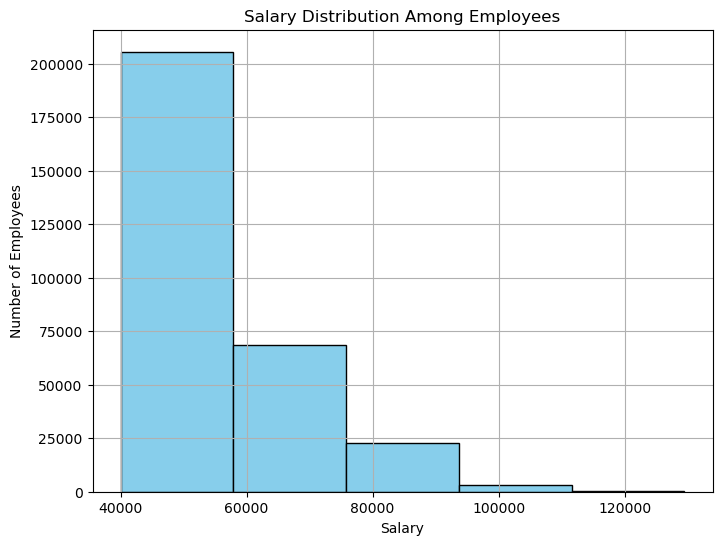

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(df['salary'], bins=5, color='skyblue', edgecolor='black')
plt.title('Salary Distribution Among Employees')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

## Q10.Bar graph to show the Average salary per title (designation)

In [7]:
FINAL_TB=pd.read_sql('select * from [dbo].[FINAL_TB]',engine, parse_dates=['hire_date','birth_date','last_date'])
FINAL_TB

,emp_no,first_name,last_name,birth_date,sex,emp_title_id,title,salary,dept_no,dept_name,hire_date,no_of_projects,Last_performance_rating,left,last_date
0,100000,Hiroyasu,Emden,1956-01-11,M,s0002,Senior Staff,41408.0,d008,Research,1991-07-02,1,S,False,NaT
1,100001,Jasminko,Antonakopoulos,1953-02-07,M,e0002,Engineer,40000.0,d005,development,1994-12-25,9,B,False,NaT
2,100001,Jasminko,Antonakopoulos,1953-02-07,M,e0002,Engineer,40000.0,d008,Research,1994-12-25,9,B,False,NaT
3,100002,Claudi,Kolinko,1957-03-04,F,s0002,Senior Staff,40000.0,d008,Research,1988-02-20,1,B,False,NaT
4,100003,Marsja,Trogemann,1959-08-30,M,e0003,Senior Engineer,40000.0,d005,development,1987-08-26,7,A,False,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331598,99995,Eckart,Usdin,1956-05-23,M,e0003,Senior Engineer,46528.0,d004,Production,1987-11-19,10,A,False,NaT
331599,99996,Gal,Melski,1958-02-02,M,e0003,Senior Engineer,40000.0,d005,development,1986-10-12,4,A,False,NaT
331600,99997,Mack,Morris,1963-04-30,M,s0001,Staff,76353.0,d007,Sales,1995-01-08,9,A,False,NaT
331601,99998,Parto,Lally,1961-10-31,F,e0002,Engineer,42258.0,d005,development,1995-03-03,8,B,False,NaT


In [49]:
unique_employees = FINAL_TB.drop_duplicates(subset='emp_no')


avg_salary_by_title = unique_employees.groupby('title')['salary'].mean().sort_values(ascending=False).reset_index()

avg_salary_by_title

,title,salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447
5,Engineer,48535.336511
6,Senior Engineer,48506.799871


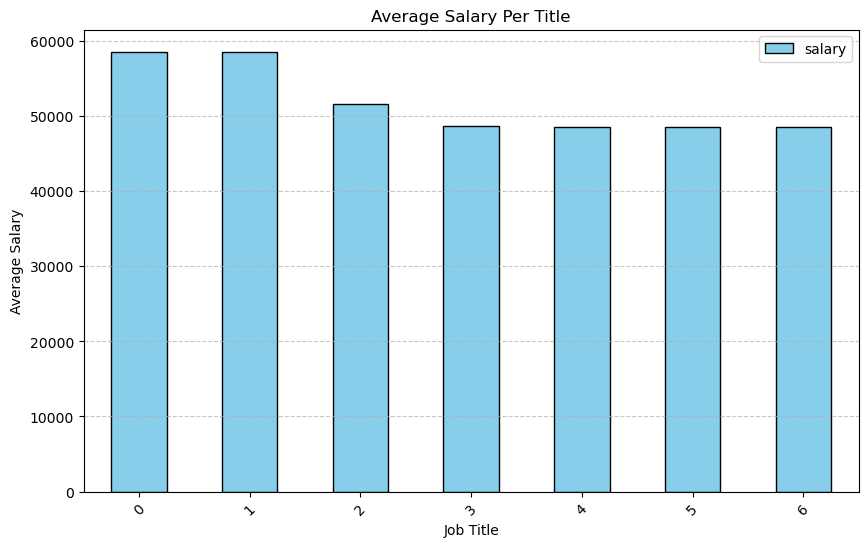

In [51]:
avg_salary_by_title.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Average Salary Per Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Q11. Calculate employee tenure & show the tenure distribution among the employees

In [53]:
FINAL_TB['hire_date'] = pd.to_datetime(df['hire_date'])
FINAL_TB['last_date'] = pd.to_datetime(df['last_date'])
new_df = pd.DataFrame()
new_df['emp_no'] = FINAL_TB['emp_no']
new_df['tenure'] = (FINAL_TB['last_date'].fillna(pd.Timestamp.today()) - FINAL_TB['hire_date']).dt.days / 365

new_df.head()

,emp_no,tenure
0,100000,33.717808
1,100001,30.232877
2,100001,37.082192
3,100002,37.569863
4,100003,39.213699


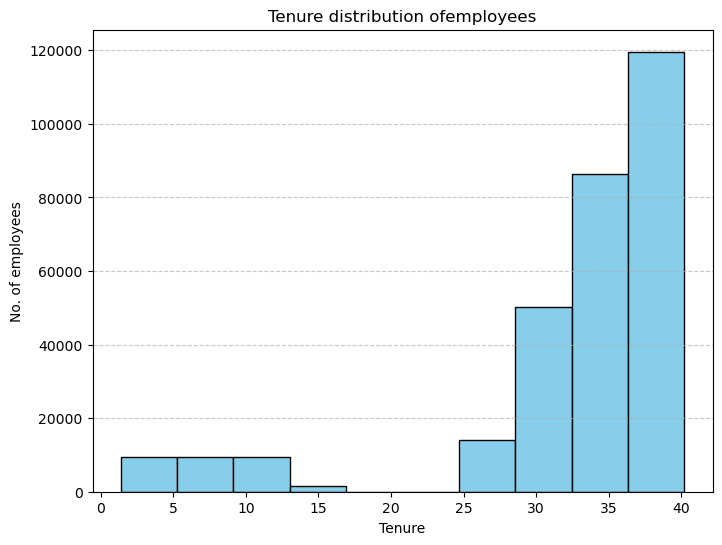

In [55]:
plt.figure(figsize=(8, 6))
plt.hist(new_df['tenure'], color='skyblue', edgecolor='black')
plt.title('Tenure distribution ofemployees')
plt.xlabel('Tenure')
plt.ylabel('No. of employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 1. Employee Attrition Analysis

In [35]:
final_table=pd.read_sql('select * from [dbo].[FINAL_TABLE]',engine,parse_dates=['hire_date','birth_date','last_date'])
final_table.sample(5)

,emp_no,first_name,last_name,birth_date,sex,emp_title_id,title,salary,no_of_departments,dept_nos,dept_names,hire_date,no_of_projects,Last_performance_rating,left,last_date
171332,108594,Jongsuk,Middleton,1956-09-13,F,s0001,Staff,56022.0,1,d009,Customer Service,1988-08-06,4,B,False,NaT
1885,400005,Barton,Jonsson,1961-02-10,M,e0003,Senior Engineer,70959.0,1,d004,Production,1986-07-09,8,B,False,NaT
153097,91218,Jenwei,Thimonier,1957-02-08,F,s0001,Staff,53191.0,1,d003,Human Resources,1989-04-22,5,B,False,NaT
23425,419587,Aron,Wynblatt,1956-03-12,M,s0001,Staff,51809.0,1,d001,Marketing,1992-12-17,1,B,False,NaT
257488,268713,Sakthirel,Sambasivam,1960-07-28,M,s0002,Senior Staff,61741.0,1,d002,Finance,1993-04-10,7,C,False,NaT


In [59]:
emp_left = final_table[final_table['left'] == 1].shape[0]
emp_stayed = final_table[final_table['left'] == 0].shape[0]

result_df = pd.DataFrame({
    'emp_status': ['emp_left', 'emp_stayed'],
    'no_of_emp': [emp_left, emp_stayed]
})

result_df['percntg'] = (result_df['no_of_emp'] * 100.00) / result_df['no_of_emp'].sum()
result_df

,emp_status,no_of_emp,percntg
0,emp_left,29867,9.95487
1,emp_stayed,270157,90.04513


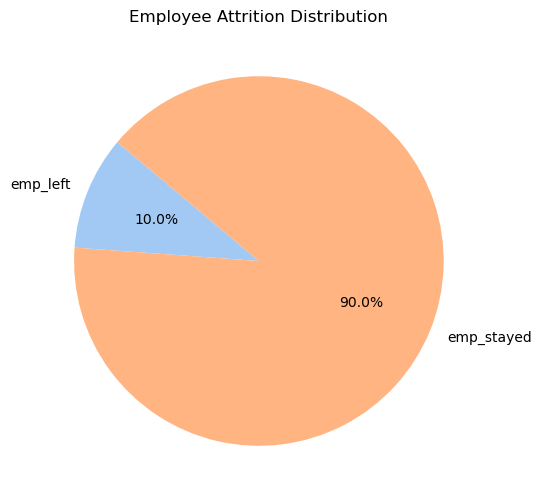

In [61]:
# Define colors for the pie chart
colors = sns.color_palette("pastel")  # Light pastel colors

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(result_df['no_of_emp'], labels=result_df['emp_status'], autopct='%1.1f%%', colors=colors, startangle=140)

# Add a title
plt.title("Employee Attrition Distribution")

# Show the pie chart
plt.show()

## 2. Attrition by Gender

In [63]:
male_emp = final_table[(final_table['left'] == 1) & (final_table['sex']=='M')].shape[0]
female_emp = final_table[(final_table['left'] == 1) & (final_table['sex']=='F')].shape[0]

gen_df = pd.DataFrame({
    'emp_gender': ['male_emp', 'female_emp'],
    'no_of_emp': [male_emp, female_emp]
})

gen_df['percntg'] = (gen_df['no_of_emp'] * 100.00) / gen_df['no_of_emp'].sum()
gen_df

,emp_gender,no_of_emp,percntg
0,male_emp,17960,60.133257
1,female_emp,11907,39.866743


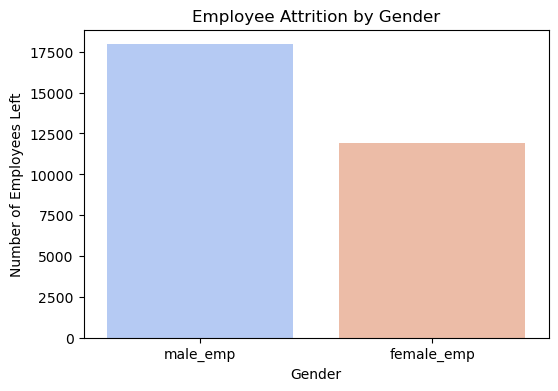

In [65]:
plt.figure(figsize=(6,4))
sns.barplot(x='emp_gender', y='no_of_emp', data=gen_df, hue='emp_gender', legend=False, palette='coolwarm')
plt.xlabel("Gender")
plt.ylabel("Number of Employees Left")
plt.title("Employee Attrition by Gender")
plt.show()

## Attrition by Department

In [67]:


filtered_df = FINAL_TB[FINAL_TB['left'] == True]
dept_count = filtered_df.groupby('dept_name').size().reset_index(name='total_no')
total_no_sum = dept_count['total_no'].sum()
dept_count['pct'] = dept_count['total_no'] * 100.0 / total_no_sum
dept_count_sorted = dept_count.sort_values(by='total_no', ascending=False)
dept_count_sorted


,dept_name,total_no,pct
8,development,8508,25.765422
4,Production,7389,22.376669
7,Sales,5209,15.774810
0,Customer Service,2414,7.310499
6,Research,2098,6.353533
5,Quality Management,2018,6.111263
3,Marketing,1941,5.878078
2,Human Resources,1797,5.441991
1,Finance,1647,4.987735


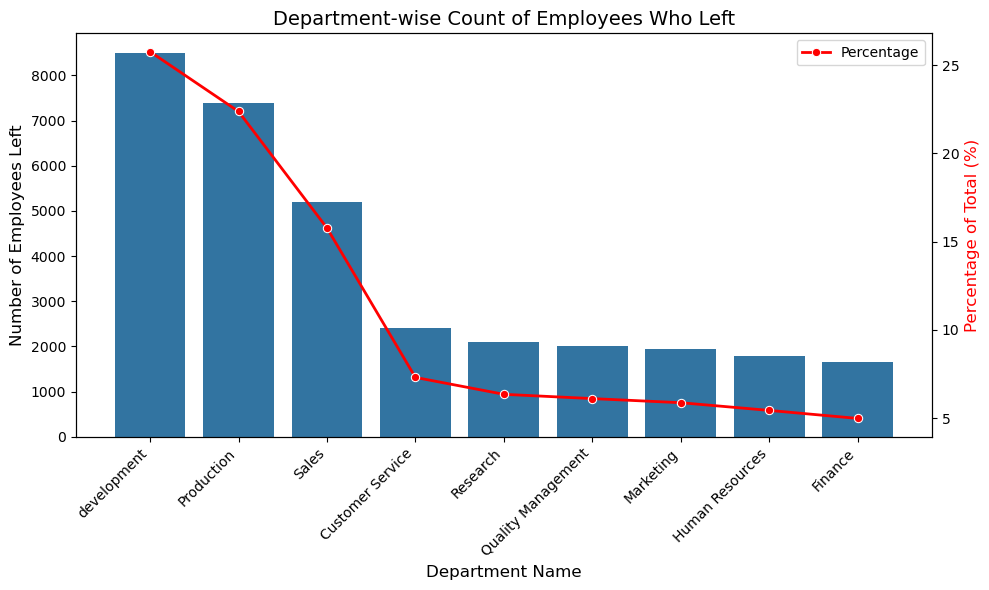

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dept_count_sorted, x='dept_name', y='total_no', hue=None)

plt.title('Department-wise Count of Employees Who Left', fontsize=14)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Number of Employees Left', fontsize=12)

plt.xticks(rotation=45, ha='right')

ax2 = plt.gca().twinx()
sns.lineplot(data=dept_count_sorted, x='dept_name', y='pct', ax=ax2, color='red', marker='o', label='Percentage', linewidth=2)

ax2.set_ylabel('Percentage of Total (%)', fontsize=12, color='red')

# Show the plot
plt.tight_layout()
plt.show()

## Attrition by Job Title

In [71]:
df_filtered = final_table[final_table['left'] == True]

title_counts = df_filtered.groupby('title').size().reset_index(name='total_no')

total_sum = title_counts['total_no'].sum()
title_counts['pct'] = title_counts['total_no'] * 100.0 / total_sum

title_counts_sorted = title_counts.sort_values(by='total_no', ascending=False)

title_counts_sorted

,title,total_no,pct
5,Staff,10693,35.802056
3,Senior Engineer,9794,32.792045
1,Engineer,4707,15.759869
4,Senior Staff,2578,8.631600
6,Technique Leader,1533,5.132755
0,Assistant Engineer,560,1.874979
2,Manager,2,0.006696


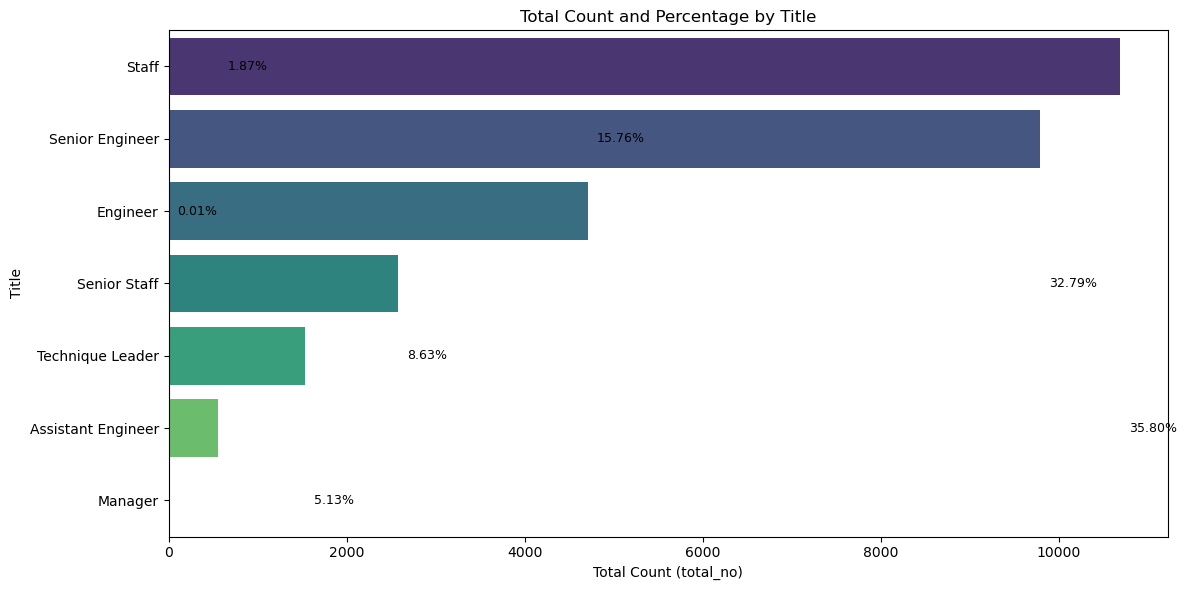

In [73]:
plt.figure(figsize=(12, 6))

sns.barplot(x='total_no', y='title', hue='title', data=title_counts_sorted, palette='viridis')

plt.xlabel('Total Count (total_no)')
plt.ylabel('Title')
plt.title('Total Count and Percentage by Title')

for index, row in title_counts_sorted.iterrows():
    plt.text(row['total_no'] + 100, index, f"{row['pct']:.2f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Attrition by Salary Range

In [75]:
# Assuming 'df' is the DataFrame containing the data from 'final_table'
# Step 1: Filter the data where 'left' == 1
filtered_df = final_table[final_table['left'] == True]

# Step 2: Create a new column for salary range using conditions
def get_salary_range(salary):
    if 40000 <= salary <= 60000:
        return '40k-60k'
    elif 60001 <= salary <= 80000:
        return '60k-80k'
    elif 80001 <= salary <= 100000:
        return '80k-100k'
    elif 100001 <= salary <= 129492:
        return '100k-130k'
    else:
        return 'Unknown'

# Apply the function to create the 'salary_range' column
filtered_df['salary_range'] = filtered_df['salary'].apply(get_salary_range)

# Step 3: Group by 'salary_range' and count the number of employees
salary_counts = filtered_df.groupby('salary_range')['emp_no'].count().reset_index(name='NO_OF_EMP')

# Step 4: Calculate the total number of employees
total_employees = salary_counts['NO_OF_EMP'].sum()

# Step 5: Calculate the percentage for each salary range
salary_counts['PCT'] = salary_counts['NO_OF_EMP'] * 100.0 / total_employees

# Step 6: Sort by 'salary_range'
salary_counts_sorted = salary_counts.sort_values('salary_range')

# Display the result
salary_counts_sorted


C:\Users\Saheli\AppData\Local\Temp\ipykernel_26224\1807761375.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['salary_range'] = filtered_df['salary'].apply(get_salary_range)


,salary_range,NO_OF_EMP,PCT
0,100k-130k,141,0.472093
1,40k-60k,21727,72.745840
2,60k-80k,6493,21.739713
3,80k-100k,1506,5.042354


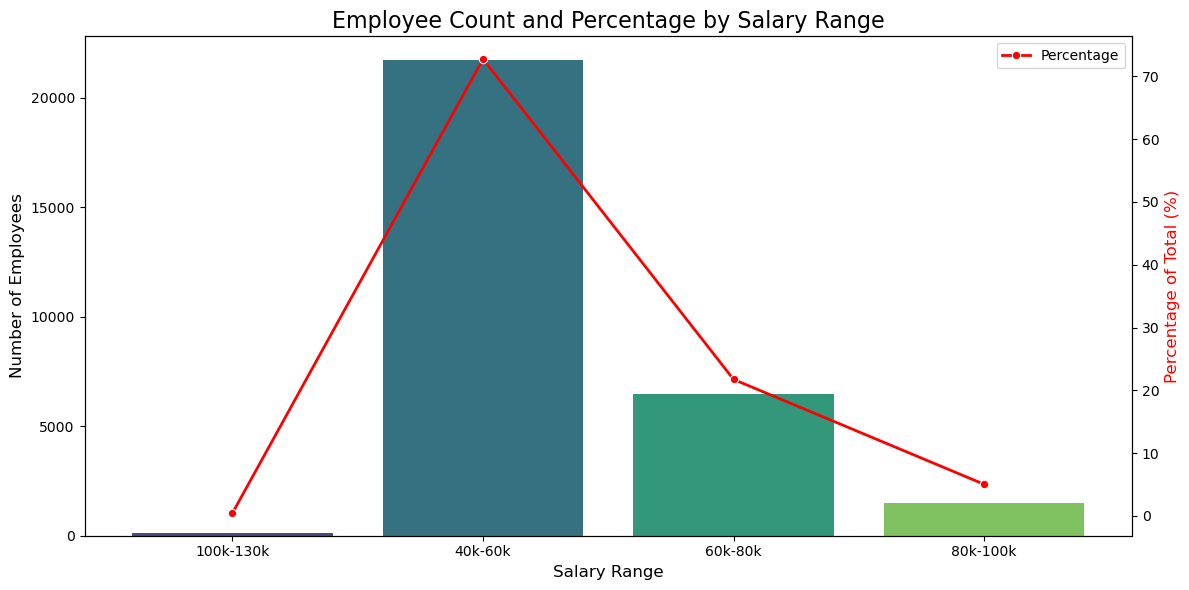

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=salary_counts_sorted, x='salary_range', y='NO_OF_EMP', hue='salary_range', palette='viridis')


plt.title('Employee Count and Percentage by Salary Range', fontsize=16)
plt.xlabel('Salary Range', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

ax2 = plt.gca().twinx()
sns.lineplot(data=salary_counts_sorted, x='salary_range', y='PCT', ax=ax2, color='red', marker='o', label='Percentage', linewidth=2)

ax2.set_ylabel('Percentage of Total (%)', fontsize=12, color='red')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


##  Attrition by Performance Rating

In [79]:

filtered_df = final_table[final_table['left'] == 1]
grouped_df = filtered_df.groupby('Last_performance_rating').size().reset_index(name='total_no')
total_count = grouped_df['total_no'].sum()
grouped_df['pct'] = (grouped_df['total_no'] * 100.0) / total_count
grouped_df = grouped_df.sort_values(by='total_no', ascending=False)
grouped_df


,Last_performance_rating,total_no,pct
1,B,10606,35.510764
0,A,9532,31.914822
2,C,7142,23.912680
3,PIP,1517,5.079184
4,S,1070,3.582549


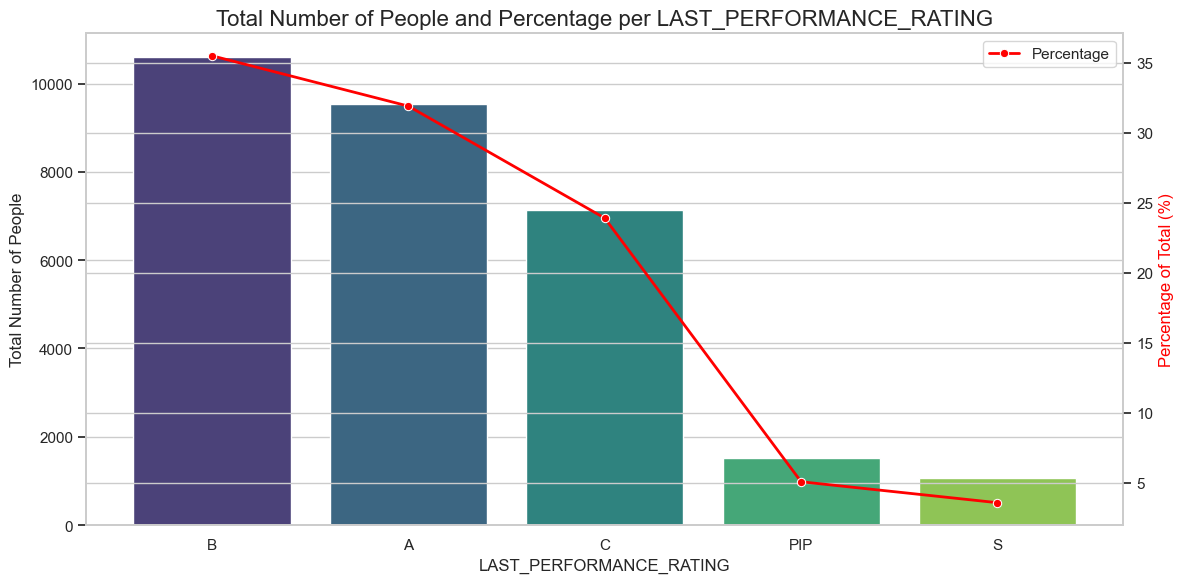

In [81]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x='Last_performance_rating', y='total_no', data=grouped_df, hue='Last_performance_rating', palette="viridis")

plt.title('Total Number of People and Percentage per LAST_PERFORMANCE_RATING', fontsize=16)
plt.xlabel('LAST_PERFORMANCE_RATING', fontsize=12)
plt.ylabel('Total Number of People', fontsize=12)

ax2 = plt.gca().twinx()

sns.lineplot(x='Last_performance_rating', y='pct', data=grouped_df, ax=ax2, color='red', marker='o', label='Percentage', linewidth=2)

ax2.set_ylabel('Percentage of Total (%)', fontsize=12, color='red')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

## Attrition by Tenure

In [83]:
final_table['hire_date'] = pd.to_datetime(final_table['hire_date'])
final_table['last_date'] = pd.to_datetime(final_table['last_date'])
final_table['tenure'] = ((final_table['last_date'].fillna(pd.Timestamp.today()) - final_table['hire_date']).dt.days / 365)
filtered_df = final_table[final_table['left'] == 1]

def tenure_group(tenure):
    if 1 <= tenure <= 4:
        return 'Low Tenure(>=1 to <=4)'
    elif 4 < tenure <= 8:
        return 'Medium Tenure(>4 to <=8)'
    else:
        return 'High Tenure(>8 to <=14)'

filtered_df['tenure_group'] = filtered_df['tenure'].apply(tenure_group)
grouped_df = filtered_df.groupby('tenure_group').size().reset_index(name='NO_OF_EMP')
grouped_df['PCT'] = (grouped_df['NO_OF_EMP'] * 100.00) / grouped_df['NO_OF_EMP'].sum()
grouped_df

C:\Users\Saheli\AppData\Local\Temp\ipykernel_26224\4068108831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tenure_group'] = filtered_df['tenure'].apply(tenure_group)


,tenure_group,NO_OF_EMP,PCT
0,High Tenure(>8 to <=14),13768,46.097700
1,Low Tenure(>=1 to <=4),6380,21.361369
2,Medium Tenure(>4 to <=8),9719,32.540931


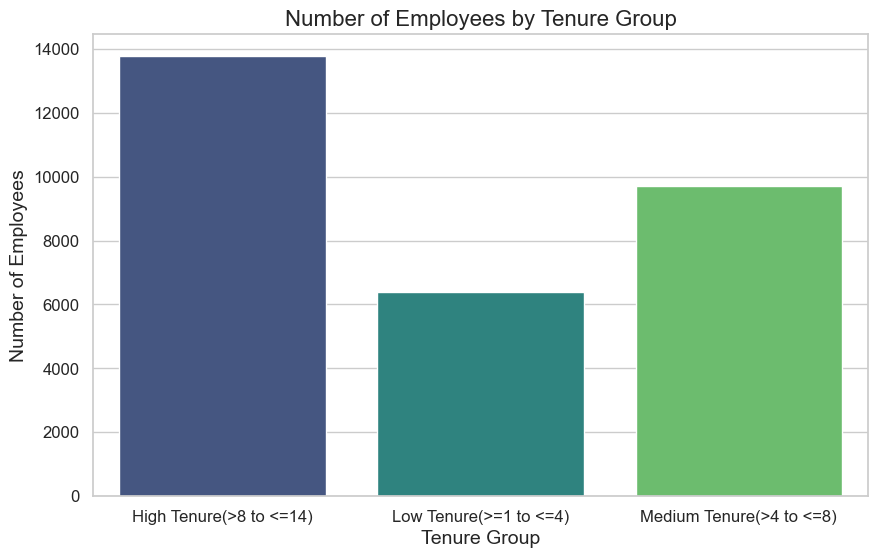

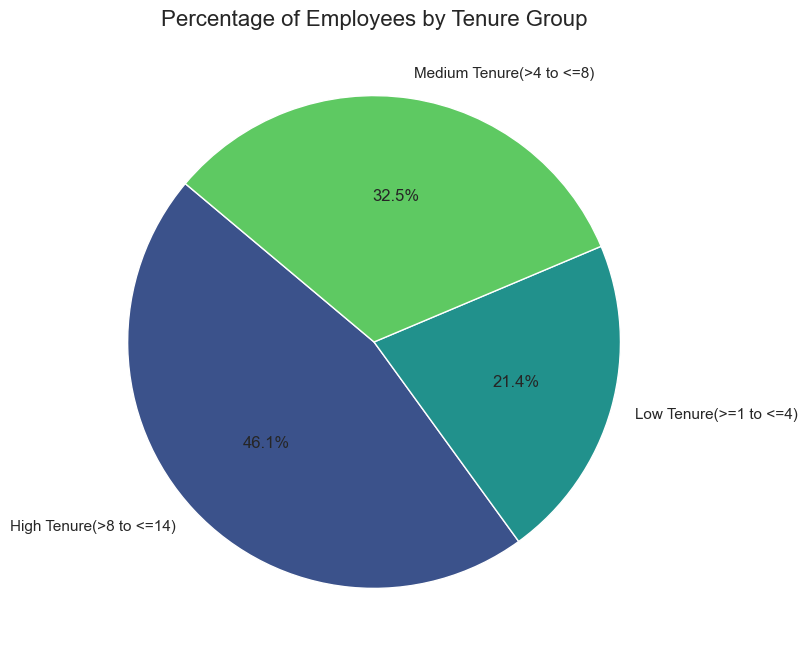

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_group', y='NO_OF_EMP', data=grouped_df,hue='tenure_group', palette='viridis')
plt.title('Number of Employees by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(
    grouped_df['PCT'],
    labels=grouped_df['tenure_group'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(grouped_df)))
plt.title('Percentage of Employees by Tenure Group', fontsize=16)
plt.show()

## Attrition by Age Group

In [87]:
final_table['hire_date'] = pd.to_datetime(final_table['birth_date'])
final_table['last_date'] = pd.to_datetime(final_table['last_date'])

final_table['age'] = ((final_table['last_date'].fillna(pd.Timestamp.today()) - final_table['birth_date']).dt.days / 365)

filtered_df = final_table[final_table['left'] == 1]

def age_group(age):
    if 21 <= age <= 30:
        return '21-30'
    elif 30 < age <= 40:
        return '31-40'
    elif 40 < age <= 50:
        return '41-50'
    elif 50 < age <= 60:
        return '51-60'     
    else:
        return '>60'

filtered_df['age_group'] = filtered_df['age'].apply(age_group)
grouped_df = filtered_df.groupby('age_group').size().reset_index(name='NO_OF_EMP')
grouped_df['PCT'] = (grouped_df['NO_OF_EMP'] * 100.00) / grouped_df['NO_OF_EMP'].sum()
grouped_df

C:\Users\Saheli\AppData\Local\Temp\ipykernel_26224\1439051532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = filtered_df['age'].apply(age_group)


,age_group,NO_OF_EMP,PCT
0,21-30,2313,7.744333
1,31-40,14674,49.131148
2,41-50,11605,38.855593
3,51-60,1273,4.262229
4,>60,2,0.006696


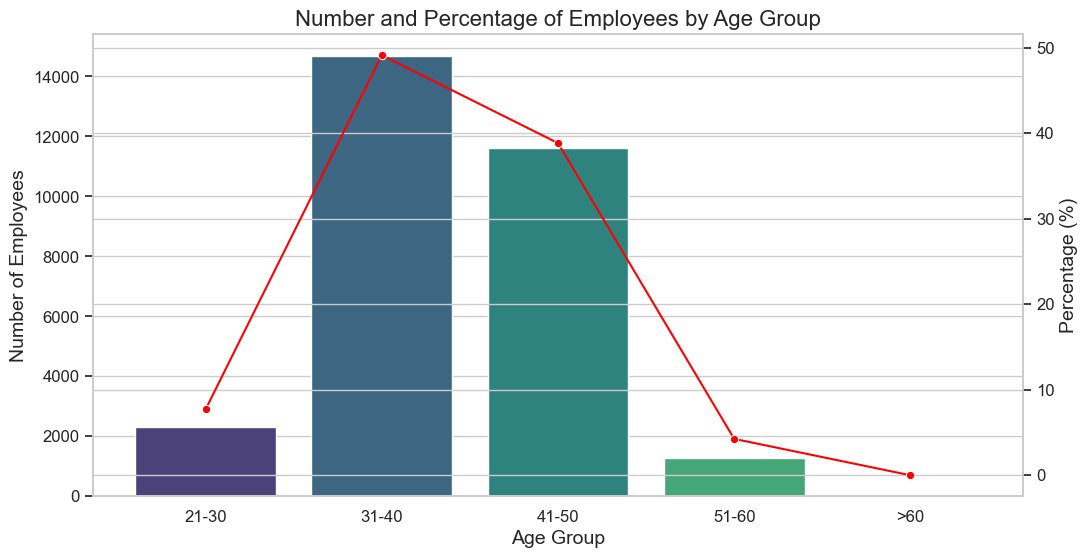

In [89]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='age_group', y='NO_OF_EMP', data=grouped_df,hue='age_group', palette='viridis', ax=ax1)
ax1.set_title('Number and Percentage of Employees by Age Group', fontsize=16)
ax1.set_xlabel('Age Group', fontsize=14)
ax1.set_ylabel('Number of Employees', fontsize=14)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax2 = ax1.twinx()
sns.lineplot(x='age_group', y='PCT', data=grouped_df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

plt.show()

## Attrition by Number of Projects

In [91]:
filtered_df = final_table[final_table['left'] == 1].copy()
conditions = [
    (filtered_df['no_of_projects'].between(1, 3)),
    (filtered_df['no_of_projects'].between(4, 7)),
    (filtered_df['no_of_projects'].between(8, 10))
]
choices = ['Low(1-3)', 'Medium(4-7)', 'High(8-10)']
filtered_df['project_category'] = np.select(conditions, choices, default='Out of Range')
grouped_df = filtered_df.groupby('project_category')['no_of_projects'].sum().reset_index(name='total_projects')

total_projects = grouped_df['total_projects'].sum()
grouped_df['PCT'] = (grouped_df['total_projects'] * 100.0) / total_projects
grouped_df = grouped_df.sort_values(by='total_projects', ascending=False)
grouped_df

,project_category,total_projects,PCT
0,High(8-10),81383,49.254671
2,Medium(4-7),65841,39.848332
1,Low(1-3),18005,10.896998


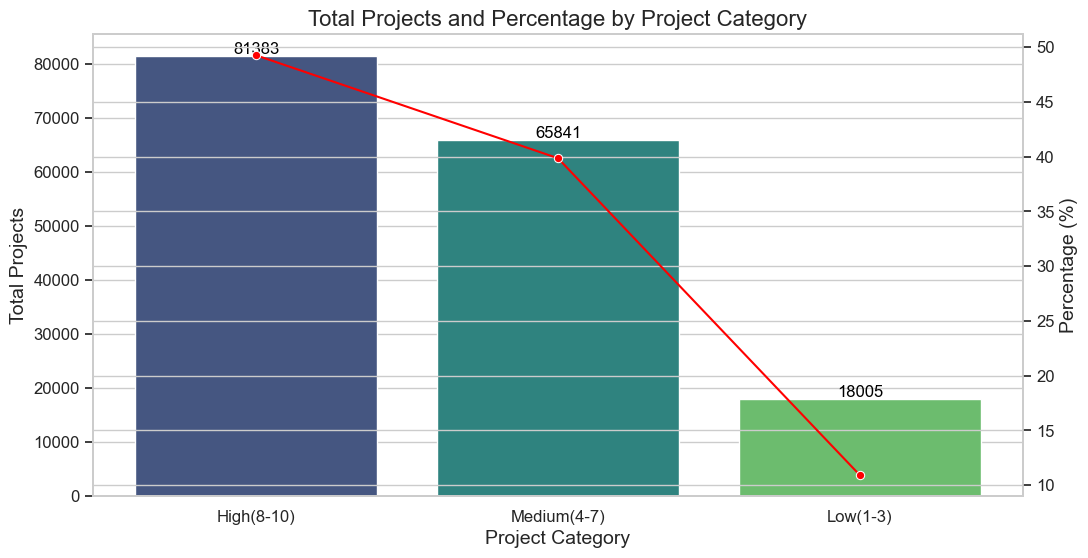

In [93]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='project_category', y='total_projects', data=grouped_df,hue='project_category', palette='viridis', ax=ax1)
ax1.set_title('Total Projects and Percentage by Project Category', fontsize=16)
ax1.set_xlabel('Project Category', fontsize=14)
ax1.set_ylabel('Total Projects', fontsize=14)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

ax2 = ax1.twinx()
sns.lineplot(x='project_category', y='PCT', data=grouped_df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)

plt.savefig('project_category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Employees with Highest Salaries

In [95]:
final_table['emp_name'] = final_table['first_name'] + ' ' + final_table['last_name']
top_10_employees = final_table.sort_values(by='salary', ascending=False).head(10)

result = top_10_employees[['emp_no', 'emp_name', 'title', 'salary']]
result

,emp_no,emp_name,title,salary
187404,205000,Charmane Griswold,Staff,129492.0
47947,44188,Slavian Peac,Senior Staff,127238.0
51111,444756,Nahid Varker,Staff,127041.0
66012,458302,Poorav Esposito,Staff,126703.0
299461,37558,Juichirou Thambidurai,Staff,125469.0
288446,296857,Toshimo Reghbati,Staff,124357.0
181947,20004,Radoslaw Pfau,Senior Staff,123749.0
172146,109334,Tsutomu Alameldin,Staff,123668.0
83781,474456,Martine Heydon,Staff,123477.0
84032,474684,Chinhyun Klyachko,Staff,122726.0


## Average Salary by Performance Rating

In [97]:
result = final_table.groupby('Last_performance_rating').agg(
    avg_salary=('salary', 'mean'),  
    min_salary=('salary', 'min'),   
    max_salary=('salary', 'max'),   
    employee_count=('salary', 'size')  
).reset_index()

result = result.sort_values(by='Last_performance_rating')
result

,Last_performance_rating,avg_salary,min_salary,max_salary,employee_count
0,A,52995.871902,40000.0,127238.0,95919
1,B,52965.293717,40000.0,125469.0,107154
2,C,52962.356600,40000.0,126703.0,71304
3,PIP,53013.565243,40000.0,129492.0,15105
4,S,52792.556915,40000.0,120986.0,10542


## Employee Count by Department

In [99]:
result = FINAL_TB.groupby('dept_name').size().reset_index(name='total_emp')
result = result.sort_values(by='total_emp', ascending=False).reset_index(drop=True)
result

,dept_name,total_emp
0,development,85707
1,Production,73485
2,Sales,52245
3,Customer Service,23580
4,Research,21126
5,Marketing,20211
6,Quality Management,20117
7,Human Resources,17786
8,Finance,17346


## Employee Count by Job Title

In [102]:
result = final_table.groupby('title').size().reset_index(name='total_emp')
result = result.sort_values(by='total_emp', ascending=False)
result

,title,total_emp
5,Staff,107384
3,Senior Engineer,97747
1,Engineer,47303
4,Senior Staff,26583
6,Technique Leader,15148
0,Assistant Engineer,5835
2,Manager,24


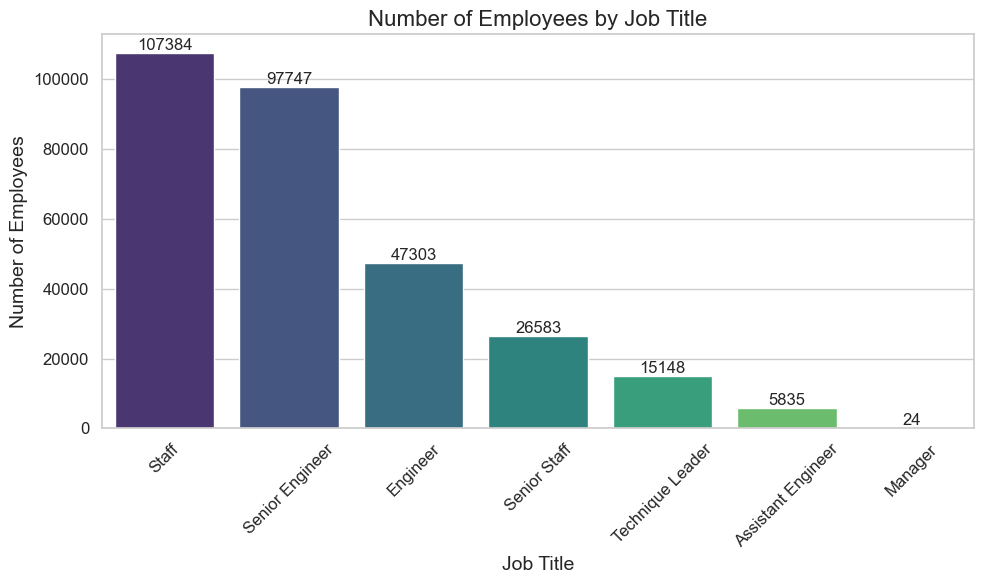

In [104]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='total_emp', data=result,hue='title', palette='viridis')
plt.title('Number of Employees by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(result['total_emp']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Average Salary by Job Title

In [107]:
result = final_table.groupby('title')['salary'].mean().reset_index(name='avg_sal')
result = result.sort_values(by='avg_sal', ascending=False)
result

,title,avg_sal
4,Senior Staff,58550.172704
5,Staff,58465.382850
2,Manager,51531.041667
6,Technique Leader,48582.896092
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
3,Senior Engineer,48506.799871


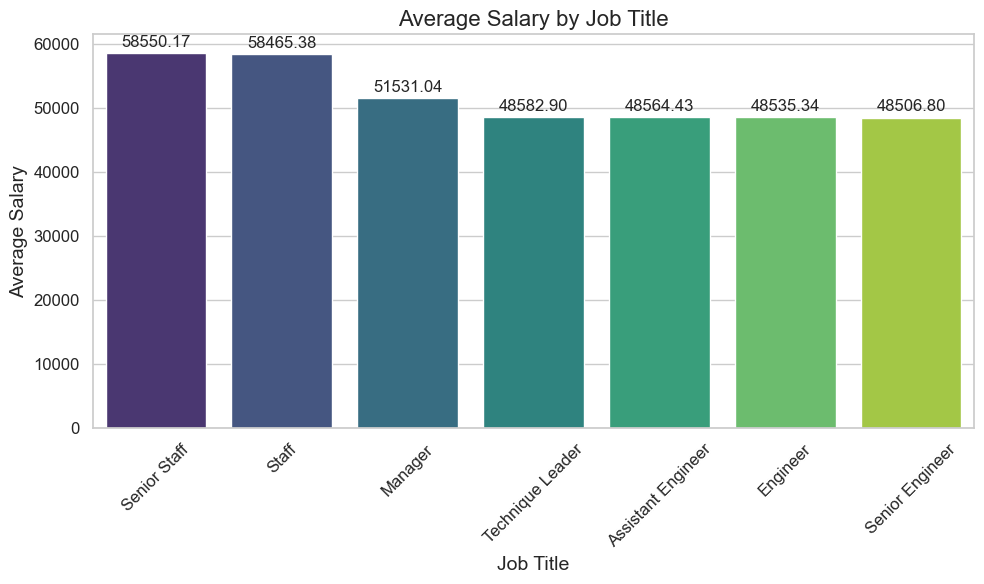

In [109]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='avg_sal', data=result,hue='title', palette='viridis')

plt.title('Average Salary by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(result['avg_sal']):
    plt.text(index, value + 500, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Employees Hire Trends

In [37]:
final_table["hire_year"] = pd.to_datetime(final_table["hire_date"]).dt.year  
result = final_table.groupby("hire_year").size().reset_index(name="employee_count")  
result = result.sort_values(by="hire_year")  

In [39]:
result

,hire_year,employee_count
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


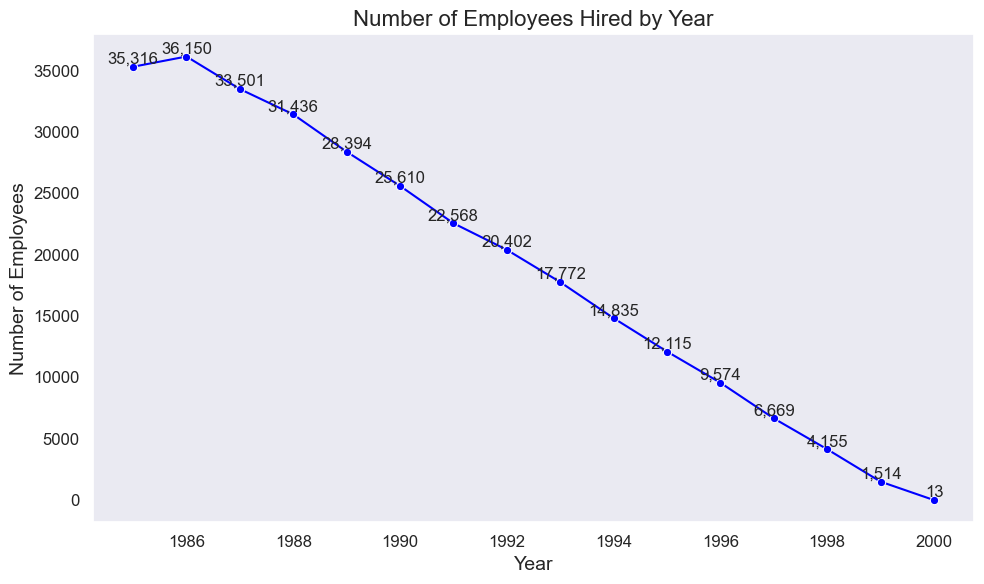

In [47]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hire_year', y='employee_count', data=result, marker='o', color='blue')

plt.title('Number of Employees Hired by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for index, row in result.iterrows():
    plt.text(row['hire_year'], row['employee_count'] + 0.1, f"{row['employee_count']:,}", ha='center', va='bottom', fontsize=12)

plt.grid(False)
plt.tight_layout()
plt.show()

## Employee Exit Trends 

In [19]:
final_table['last_date'] = pd.to_datetime(final_table['last_date'], errors='coerce')
final_table_valid = final_table[final_table['last_date'].notna()]
final_table_valid['exit_year'] = final_table_valid['last_date'].dt.year
exit_counts = final_table_valid.groupby('exit_year').agg(total_exits=('emp_no', 'count')).reset_index()
exit_counts_sorted = exit_counts.sort_values(by='exit_year').reset_index(drop=True)

exit_counts_sorted


C:\Users\Saheli\AppData\Local\Temp\ipykernel_30164\386586974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_valid['exit_year'] = final_table_valid['last_date'].dt.year


,exit_year,total_exits
0,1986,42
1,1987,305
2,1988,605
3,1989,916
4,1990,1131
5,1991,1375
6,1992,1494
7,1993,1759
8,1994,1870
9,1995,2085


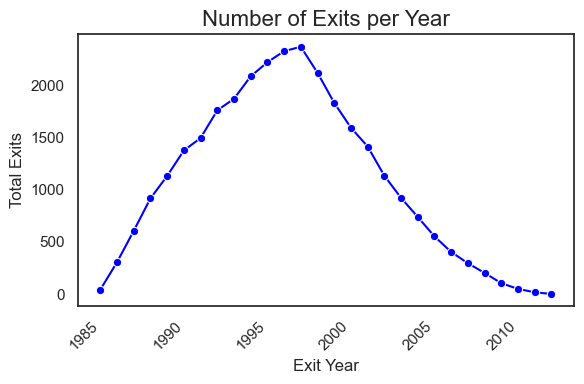

In [21]:
sns.set(style="white")
plt.figure(figsize=(6,4)) 
sns.lineplot(data=exit_counts_sorted, x='exit_year', y='total_exits', marker='o', color='blue')
plt.title('Number of Exits per Year', fontsize=16)
plt.xlabel('Exit Year', fontsize=12)
plt.ylabel('Total Exits', fontsize=12)

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [33]:
final_table.head()

,emp_no,first_name,last_name,birth_date,sex,emp_title_id,title,salary,no_of_departments,dept_nos,dept_names,hire_date,no_of_projects,Last_performance_rating,left,last_date,hire_year
0,38121,Aram,Gini,1961-09-05,F,e0003,Senior Engineer,40000.0,1,d004,Production,1970,5,B,False,NaT,1970
1,38122,Garnik,Clouatre,1958-06-27,M,s0001,Staff,40000.0,1,d002,Finance,1970,1,A,False,NaT,1970
2,38123,Kien,Cummings,1953-09-03,M,s0001,Staff,69068.0,1,d007,Sales,1970,10,A,True,1989-06-22,1970
3,38124,Mayuko,Waschkowski,1958-01-30,M,e0003,Senior Engineer,40421.0,2,"d005, d008","development, Research",1970,4,A,False,NaT,1970
4,38125,Kiyokazu,Jumpertz,1962-12-18,M,e0003,Senior Engineer,66463.0,1,d005,development,1970,6,C,False,NaT,1970


## Salary Growth Over Time

In [49]:
result = final_table.groupby("hire_year")["salary"].mean().reset_index(name="avg_salary")
result = result.sort_values(by="hire_year")
result

,hire_year,avg_salary
0,1985,53010.028712
1,1986,53032.646971
2,1987,52971.025671
3,1988,52834.376034
4,1989,53050.462457
5,1990,52972.319680
6,1991,52876.868885
7,1992,52902.187776
8,1993,53152.138139
9,1994,52994.960836


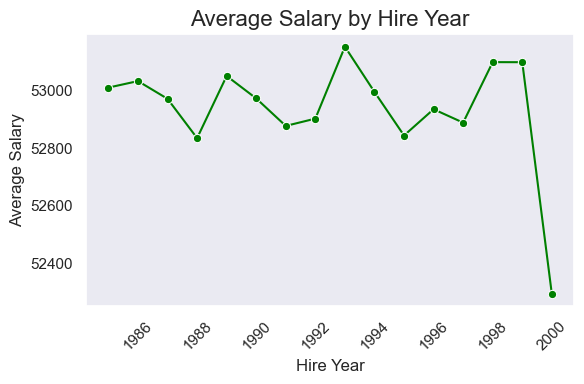

In [51]:
plt.figure(figsize=(6, 4))  
sns.lineplot(data=result, x='hire_year', y='avg_salary', marker='o', color='green')
plt.title('Average Salary by Hire Year', fontsize=16)
plt.xlabel('Hire Year', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


## Distribution of Employees by Gender

In [418]:
female_count = final_table[final_table['sex'] == 'F'].shape[0]
male_count = final_table[final_table['sex'] == 'M'].shape[0]

gender_counts = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'total_no': [female_count, male_count]
})

total_count = gender_counts['total_no'].sum()
gender_counts['pct'] = (gender_counts['total_no'] * 100) / total_count
gender_counts

,gender,total_no,pct
0,Female,120051,40.013799
1,Male,179973,59.986201


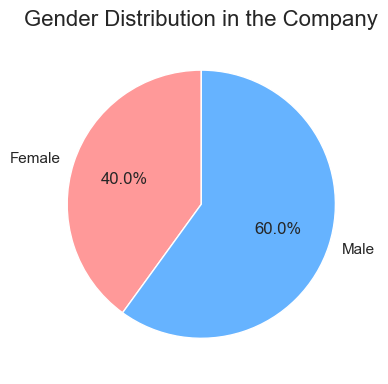

In [419]:
plt.figure(figsize=(4, 4))  # Set the size of the plot
plt.pie(gender_counts['total_no'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution in the Company', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()